Multiple Logistic Regression

In [1]:
#Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [82]:
#Importing Logistic Regression from Sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [21]:
#Writing the Hypothesis and Cost functions

def fcnAddBias(X):
    Z = np.insert(X, 0, 1, axis = 1)
    return Z

def fcnApplySoftmaxFunction(PredictedVector):
    PredictedVectorExponential = np.exp(PredictedVector)
    return PredictedVectorExponential / np.sum(PredictedVectorExponential)

def fcnApplyHypothesisFunction(Weight, X):
    z = Weight @ X
    return fcnApplySoftmaxFunction(z)

def fcnCrossEntopyCostFunction(yi, yp):
    return - np.vdot(yi, np.log(yp))

In [42]:
#Updating the weights using Gradient Descent

def fcnCrossEntropyCostValue(x, y, w):
    intNumberOfSamples = x.shape[0]
    intCrossEntropySum = 0.0
    for intCtr in range(0, intNumberOfSamples):
        Xihat = x[intCtr]
        yi = y[intCtr]
        yp = fcnApplyHypothesisFunction(w, Xihat)
        intCrossEntropySum += fcnCrossEntopyCostFunction(yi, yp)
    return intCrossEntropySum / intNumberOfSamples
    
def fcnLogisticRegressionUsingSGD(X, y, intLR = 0.005, intEpochs = 5):
    
    intNumberOfSamples, intNumberOfFeatures = X.shape
    intNumberOfClass = y.shape[1]
    X = fcnAddBias(X)
    Weight = np.zeros((intNumberOfClass, intNumberOfFeatures + 1))
    CostFunctionValue = np.zeros(intEpochs)
    
    for intIterations in range(0, intEpochs):
        CostFunctionValue[intIterations] =  (fcnCrossEntropyCostValue(X, y, Weight))
        SamplePermutations = np.random.permutation(intNumberOfSamples)
        for intCtr in SamplePermutations:
            Xihat = X[intCtr]
            yi = y[intCtr]
            yp = fcnApplyHypothesisFunction(Weight, Xihat)
            gradient_Li = np.outer(yp - yi, Xihat)
            Weight = Weight - intLR * gradient_Li
            
    return Weight, CostFunctionValue

def fcnPredictLabels(X, w):
    X = fcnAddBias(X)
    intNumberOfSamples = X.shape[0]
    predictions = []
    prob = []
    for i in range(intNumberOfSamples):
        Xiht = X[i]
        yp = fcnApplyHypothesisFunction(w, Xiht)
        predictions.append(np.argmax(yp))
        prob.append(np.max(yp))
    
    return predictions, prob

In [26]:
#Using the MNIST Dataset for Classification

import tensorflow

(X_train, Y_train), (X_test, Y_test) = tensorflow.keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

In [27]:
n_train, numRows, numCols = X_train.shape
x_train = X_train.reshape((n_train, numRows * numCols))
y_train = pd.get_dummies(Y_train).values

The value in image is :  3


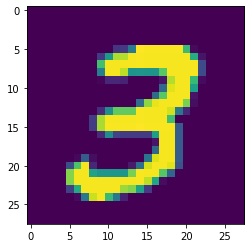

In [33]:
plt.imshow(X_train[7])
print("The value in image is : ", Y_train[7])

In [36]:
Weight, CostValue = fcnLogisticRegressionUsingSGD(x_train, y_train)

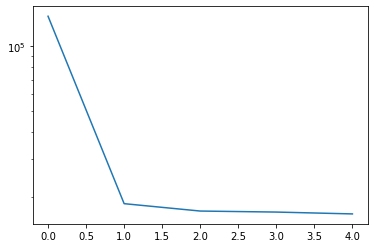

In [39]:
plt.semilogy(CostValue)

In [40]:
n_test, nRows, nCols = X_test.shape
x_test = X_test.reshape((n_test, nRows * nCols))

In [53]:
Predictions, Probability = fcnPredictLabels(x_test, Weight)
Agreement = Predictions == Y_test

numCorrect = 0
for i in range(0, n_test):
    if Predictions[i] == Y_test[i]:
        numCorrect += 1

Accuracy = numCorrect/n_test
Accuracy

0.9224

In [49]:
LogReg = LogisticRegression(solver = 'newton-cg')

LogReg.fit(x_train, Y_train)
Predicted = LogReg.predict(x_test)

In [51]:
score = LogReg.score(x_test, Y_test)
score

0.9256

In [57]:
#Confusion Matrix 

cm = metrics.confusion_matrix(Y_test, Predictions)
print(cm)

[[ 950    0    3    2    0    6   12    3    3    1]
 [   0 1109    2    2    0    4    4    2   12    0]
 [   4    9  920   16    8    4   15   11   42    3]
 [   1    0   17  920    0   25    4   12   24    7]
 [   1    2    5    1  919    0   11    3    8   32]
 [   9    2    2   33    9  778   21    6   26    6]
 [   7    3    3    2    7   11  922    2    1    0]
 [   1    7   23    7    8    1    0  957    2   22]
 [   4    8    7   23    8   38   13   13  856    4]
 [   9    7    1   10   30   10    1   35   13  893]]


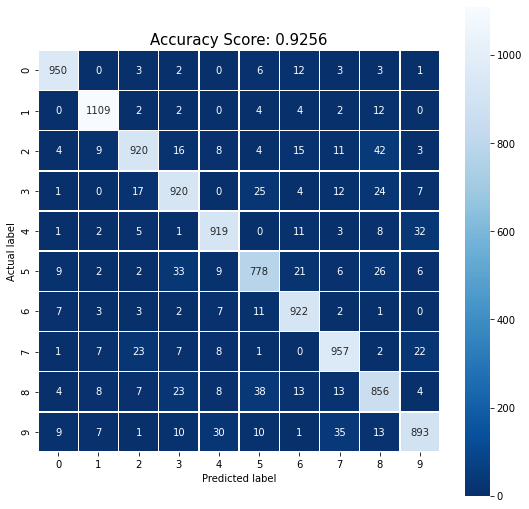

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Accuracy)
plt.title(all_sample_title, size = 15);


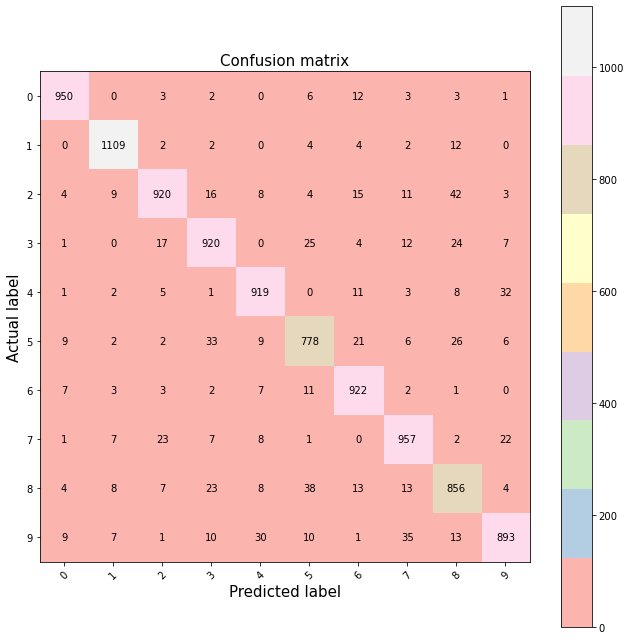

In [62]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for i in range(width):
    for j in range(height):
        plt.annotate(str(cm[i][j]), xy=(j, i), horizontalalignment='center', verticalalignment='center')

In [64]:
#Working on the IRIS dataset

data = sns.load_dataset('iris')
print(data.head())

x_iris = data.iloc[:,:-1]
y_iris = data.iloc[:,-1]

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [70]:
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris, test_size=0.3, random_state=42)

In [72]:
LRModel = LogisticRegression(solver = 'newton-cg')
LRModel.fit(x_iris_train, y_iris_train)

Predict_Iris_Class = LRModel.predict(x_iris_test)
print(Predict_Iris_Class)
print(metrics.classification_report(y_iris_test, Predict_Iris_Class))
print(metrics.accuracy_score(y_iris_test, Predict_Iris_Class))
print(LRModel.score(x_iris_test, y_iris_test))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0
1.0


In [88]:
#Working on IRIS dataset using LogisticRegressionSGD

Scaler = MinMaxScaler()
Scaled_data = pd.DataFrame(Scaler.fit_transform(data.iloc[:,:-1]), columns = ['sepal_length',  'sepal_width',  'petal_length',  'petal_width'])
LEncoder= LabelEncoder()
Scaled_data['species'] = LEncoder.fit_transform(data.iloc[:,-1]) 

X_iris_train, X_iris_test, Y_iris_train, Y_iris_test = train_test_split(Scaled_data.iloc[:,:-1], Scaled_data.iloc[:,-1], test_size=0.3, random_state=12)

X_iris_train = X_iris_train.values
Y_iris_train = pd.get_dummies(Y_iris_train.values).values

X_iris_test = X_iris_test.values 
Y_iris_test = Y_iris_test.values

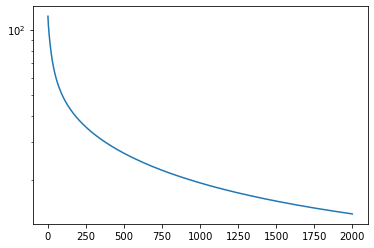

In [116]:
Weight_Iris, CostValue_Iris = fcnLogisticRegressionUsingSGD(X_iris_train, Y_iris_train, 0.005, 2000)
plt.semilogy(CostValue_Iris)

In [117]:
Predicted_Iris_Test, Prob_Iris_Test = fcnPredictLabels(X_iris_test, Weight_Iris)
print(metrics.accuracy_score(Y_iris_test, np.array(Predicted_Iris_Test)))

0.9777777777777777


In [119]:
#Confusion Matrix 

cm_iris = metrics.confusion_matrix(Y_iris_test, np.array(Predicted_Iris_Test))
print(cm_iris)

[[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]


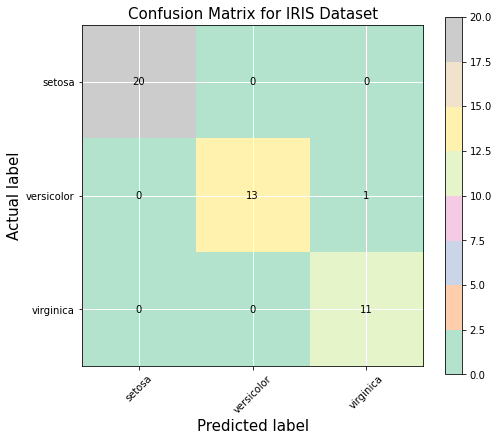

In [137]:
plt.figure(figsize=(7,6))
plt.imshow(cm_iris, interpolation = 'nearest', cmap = 'Pastel2', )
plt.title('Confusion Matrix for IRIS Dataset', size = 15)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['setosa', 'versicolor', 'virginica'], rotation=45, size = 10)
plt.yticks(tick_marks, ['setosa', 'versicolor', 'virginica'], rotation=0, size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
ax = plt.gca()
ax.grid(color='w', linestyle='-', linewidth=1)
width, height = cm_iris.shape
for i in range(width):
    for j in range(height):
        plt.annotate(str(cm_iris[i][j]), xy=(j, i), horizontalalignment='center', verticalalignment='center')